In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import pickle

In [2]:
# setting default configuration options
pd.set_option("mode.copy_on_write", True)

In [3]:
path = "/Users/revanth/Documents/messidor_base.pkl"

In [4]:
# load pickle file into a dataframe
df = pd.read_pickle(path)

In [5]:
df.sample(5)

,Image_ID,Original_Size,Image,Department,Retinopathy_Grade,Risk_of_Macular_Edema,Data_Source
443,20060523_48572_0100_PP.tif,"(2240, 1488)","[[[2, 0, 2], [2, 0, 2], [1, 0, 1], [1, 0, 1], ...",Service Ophtalmologie Lariboisière,2,0,Messidor
525,20060412_59100_0200_PP.tif,"(1440, 960)","[[[3, 0, 0], [1, 0, 0], [1, 2, 0], [0, 0, 0], ...",CHU de St Etienne,1,1,Messidor
783,20060411_58328_0200_PP.tif,"(1440, 960)","[[[0, 1, 0], [0, 1, 0], [0, 0, 0], [0, 0, 0], ...",CHU de St Etienne,3,0,Messidor
696,20051021_58388_0100_PP.tif,"(2240, 1488)","[[[1, 0, 1], [2, 1, 2], [3, 1, 3], [2, 0, 2], ...",Service Ophtalmologie Lariboisière,2,0,Messidor
64,20060412_61365_0200_PP.tif,"(1440, 960)","[[[3, 0, 2], [0, 0, 0], [0, 1, 0], [0, 0, 0], ...",CHU de St Etienne,0,0,Messidor


In [6]:
# Checking for missing values
df.isnull().sum()

Image_ID                 0
Original_Size            0
Image                    0
Department               0
Retinopathy_Grade        0
Risk_of_Macular_Edema    0
Data_Source              0
dtype: int64

<Axes: xlabel='Retinopathy_Grade'>

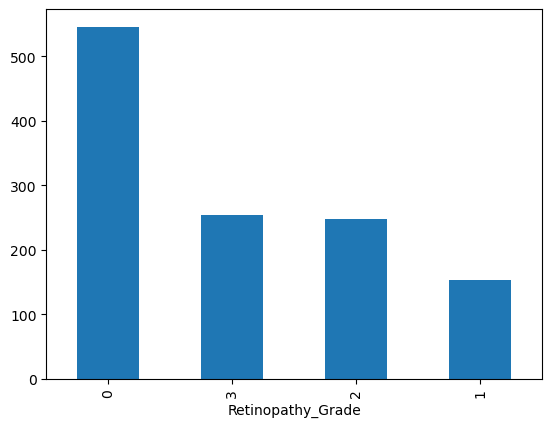

In [7]:
# plotting the distribution of the target variable
df["Retinopathy_Grade"].value_counts().plot(kind="bar")

Splitting into Train and Test

In [8]:
# shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# getting unique values from the target variable
lst = df["Retinopathy_Grade"].unique()

test_indexes = []

req_samples = 5  # <- number of samples to be taken from each unique value

# randomly sample X sample indexes from each unique value
for i in lst:
    test_indexes.extend(df[df["Retinopathy_Grade"] == i].sample(req_samples).index)

# train indexes
train_indexes = df.index.difference(test_indexes)

In [10]:
# train and test data
train_data = df.loc[train_indexes]
test_data = df.loc[test_indexes]

In [11]:
# Validate that there is no data leakage
assert train_data.index.intersection(test_data.index).shape[0] == 0

<Axes: xlabel='Retinopathy_Grade'>

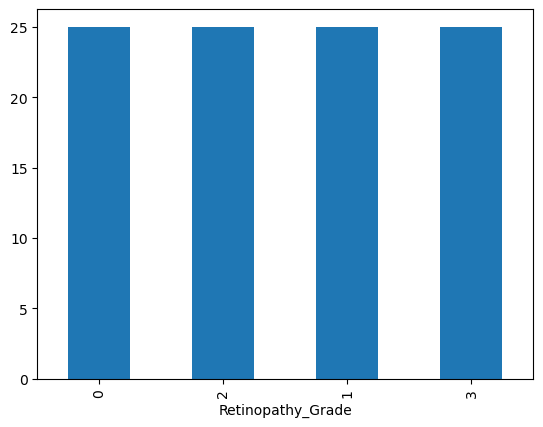

In [12]:
# validate good distribution in test data
test_data["Retinopathy_Grade"].value_counts().plot(kind="bar")

<Axes: xlabel='Retinopathy_Grade'>

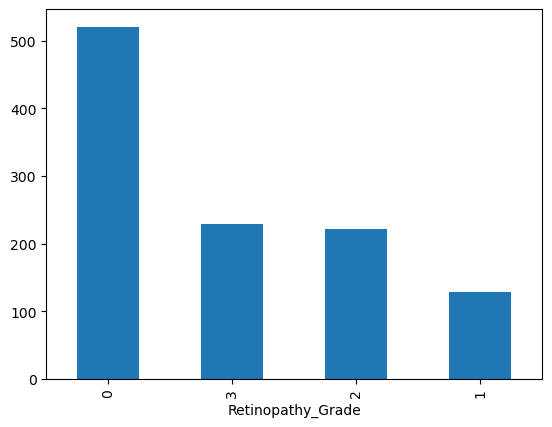

In [13]:
train_data["Retinopathy_Grade"].value_counts().plot(kind="bar")